# PROJECT STATEMENT


You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
df

Customer Name                                    Customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
5       Carla Hester                                 mi@Aliquamerat.edu   
6     Griffin Rivera                                  vehicula@at.co.uk   
7         Orli Casey    nunc.est.mollis@Suspendissetristiqueneque.co.uk   
8       Marny Obrien                        Phasellus@sedsemegestas.org   
9      Rhonda Chavez                                    nec@nuncest.com   
10       Jerome Rowe                               ipsum.cursus@dui.org   
11      Akeem Gibson                     turpis.egestas.Fusce@purus.edu   
12        Quin Smith                                    nulla@ipsum.edu   
13        Tatum Moon                       Cras.sed.leo@Seddiamlorem.ca   
14     Sharon Sharpe                       eget.metus@aaliquetvel.co.uk   
15   Thomas Williams                            aliquet.molestie@ut.org   
16     Blaine Bender         ultrices.posuere.cubilia@pedenonummyut.net   
17   Stephen Lindsey                  erat.eget.ipsum@tinciduntpede.org   
18       Sloane Mann                                 at.augue@augue.net   
19       Athena Wolf                 volutpat.Nulla.facilisis@primis.ca   
20     Blythe Romero                           Sed.eu@risusNuncac.co.uk   
21     Zelenia Byers                            auctor.non@sapien.co.uk   
22      Nola Wiggins                                  Aliquam@augue.edu   
23     Micah Wheeler                              arcu.eu@tincidunt.org   
24     Caryn Hendrix                       condimentum.Donec@duiCum.com   
25     Hedda Miranda                           scelerisque@magnased.com   
26        Ulric Lynn                        sociis@vulputateveliteu.com   
27         Alma Pope                       Nunc.mauris.Morbi@turpis.org   
28     Gemma Hendrix                                 lobortis@non.co.uk   
29       Castor Wood                       velit.Pellentesque@Nulla.net   
..               ...                                                ...   
470            Diana       purus.ac.tellus@parturientmontesnascetur.org   
471             Todd                                   egestas.a@vel.ca   
472         Zephania                                   montes@sedsem.ca   
473            Brock                     Vivamus.nisi@elitpharetraut.ca   
474             Avye                                      Cras@eros.net   
475           Serena                                  odio.Nam@estac.ca   
476          Barclay                                  diam.Proin@ut.edu   
477         Isabella                              et.magnis@necmetus.ca   
478              Mia                      sed.est@afelisullamcorper.edu   
479          Chester                           Integer@odioauctor.co.uk   
480            Isaac             pretium.aliquet.metus@pretiumneque.com   
481          Heather                           erat.Etiam@elementum.org   
482          Justine                    orci.adipiscing@penatibuset.com   
483             Bert                          sem.Pellentesque@quis.net   
484              Gil        Phasellus.fermentum@dictumplacerataugue.net   
485            Dolan              ipsum.Phasellus@egestasblanditNam.edu   
486           Cheryl                     iaculis.enim@nislelementum.edu   
487         Courtney                      porttitor.tellus@elitelit.org   
488          Neville                                  felis.Nulla@mi.ca   
489           Gloria       Curabitur.egestas.nunc@fermentumfermentum.ca   
490            Jonah                            augue@risusNuncac.co.uk   
491          Merrill            

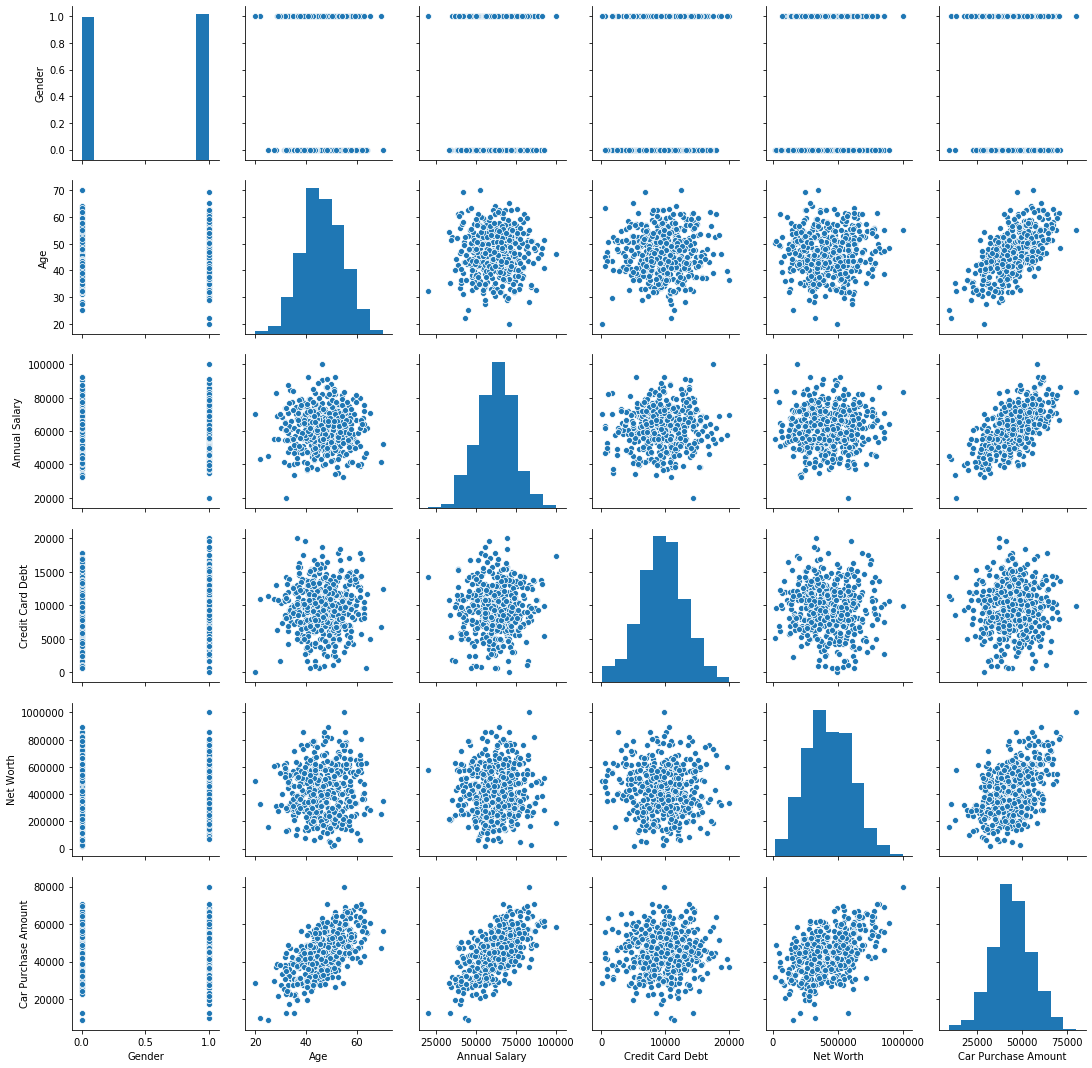

In [4]:
sns.pairplot(df)

In [5]:
x = df.drop(['Customer Name', 'Customer e-mail', 'Country','Car Purchase Amount'], axis=1)

In [6]:
x

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
5         1  56.824893    68499.85162      14179.472440  428485.3604
6         1  46.607315    39814.52200       5958.460188  326373.1812
7         1  50.193016    51752.23445      10985.696560  629312.4041
8         0  46.584745    58139.25910       3440.823799  630059.0274
9         1  43.323782    53457.10132      12884.078680  476643.3544
10        1  50.129923    73348.70745       8270.707359  612738.6171
11        1  53.180158    55421.65733      10014.969290  293862.5123
12        0  44.396494    37336.33830      10218.320920  430907.1673
13        0  48.496515    68304.47298       9466.995128  420322.0702
14        0  55.244866    72776.00382      10597.638140  146344.8965
15        1  53.289768    64662.30061      11326.034340  481433.4324
16        0  44.742200    63259.87837      11495.549990  370356.2223
17        1  48.127085    52682.06401      12514.520290  549443.5886
18        1  51.853474    54503.14423       7377.820914  431098.9998
19        0  58.741842    55368.23716      13272.946470  566022.1306
20        1  51.900471    63435.86304      11878.037790  480588.2345
21        0  48.081120    64347.34531      10905.366280  307226.0977
22        1  45.531842    65176.69055       7698.552234  497526.4566
23        1  47.022284    52027.63837      11960.853770  688466.0503
24        0  39.942995    69612.01230       8125.598993  499086.3442
25        0  52.577441    53065.57175      17805.576070  429440.3297
26        0  28.009676    82842.53385      13102.158050  315775.3207
27        0  55.630317    61388.62709      14270.007310  341691.9337
28        1  46.124036   100000.00000      17452.921790  188032.0778
29        1  40.245327    62891.86556      12522.940520  583230.9760
..      ...        ...            ...               ...          ...
470       0  59.619615    81565.95967       9072.063059  544291.9504
471       0  43.542528    65364.06334       7839.414396  579640.7982
472       1  39.281245    65019.15701       4931.560160  341330.7344
473       1  41.679623    58243.17992      15149.034260  649323.7878
474       0  32.308876    73558.87334      11164.526520  301245.7708
475       1  52.289799    66088.02369       6769.181833  557098.9636
476       0  56.287509    54441.72437       4362.720324  432850.4157
477       1  40.754052    60101.79725      12989.367840  340720.5185
478       1  50.769362    50153.43545       6596.013690  266939.1746
479       0  57.615456    61430.93415      11561.073650  421891.8460
480       0  50.801934    65846.50960       9141.668545  531840.3342
481       1  29.034521    55433.61187      10769.750590  276466.6203
482       1  52.967762    62979.60196      14297.253660  247421.9185
483       0  43.386891    76523.33258      10373.008560  620355.2658
484       0  62.070842    63956.16180      16978.527450  360787.6401
485       1  60.416433    39460.00348       8769.290288  571245.3714
486       1  36.659970    66923.43536       8611.468093  522814.8170
487       0  43.365470    50051.14039        893.235341  347177.8367
488       0  41.705059    61575.95020        594.804949  497197.2640
489       0  54.879545    64430.07398       6924.106833  664862.0102
490       1  45.752698    63722.00164      10711.444720  316128.4002
491       1  50.197205    78518.21527      10072.482980  294506.0844
492       0  55.087720    72424.80112       9831.184792  523680.7699
493       0  42.900187    77665.17195      13308.879320  349588.5608
494       0  51.767418    77345.61633       6736.751680  665099.1390
495       0  41.462515    71942.40291       6995.902524  541670.1016
496

In [7]:
y = df['Car Purchase Amount']
y.shape

(500,)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)

In [9]:
xscaled.shape

(500, 5)

In [10]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [11]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [12]:
y = y.values.reshape(-1,1)

In [13]:
yscaled = scaler.fit_transform(y)

In [14]:
yscaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [15]:
yscaled.shape

(500, 1)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xscaled,yscaled,test_size=0.25,random_state=0)

In [17]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(40, input_dim=5, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))


Using TensorFlow backend.
W0804 14:30:03.358713 139713998112576 deprecation_wrapper.py:119] From /home/sujay/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 14:30:03.379790 139713998112576 deprecation_wrapper.py:119] From /home/sujay/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 14:30:03.382669 139713998112576 deprecation_wrapper.py:119] From /home/sujay/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

W0804 14:30:03.453400 139713998112576 deprecation_wrapper.py:119] From /home/sujay/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [20]:
epochs_hist = model.fit(xtrain,ytrain, epochs=20, batch_size= 50, verbose=1, validation_split=0.2)

W0804 14:30:03.594791 139713998112576 deprecation_wrapper.py:119] From /home/sujay/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0804 14:30:03.686999 139713998112576 deprecation_wrapper.py:119] From /home/sujay/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1696 - val_loss: 0.1284
Epoch 2/20
300/300 [==============================] - 0s 164us/step - loss: 0.0724 - val_loss: 0.0516
Epoch 3/20
300/300 [==============================] - 0s 170us/step - loss: 0.0332 - val_loss: 0.0249
Epoch 4/20
300/300 [==============================] - 0s 148us/step - loss: 0.0275 - val_loss: 0.0207
Epoch 5/20
300/300 [==============================] - 0s 84us/step - loss: 0.0238 - val_loss: 0.0162
Epoch 6/20
300/300 [==============================] - 0s 192us/step - loss: 0.0160 - val_loss: 0.0136
Epoch 7/20
300/300 [==============================] - 0s 261us/step - loss: 0.0120 - val_loss: 0.0137
Epoch 8/20
300/300 [==============================] - 0s 115us/step - loss: 0.0108 - val_loss: 0.0132
Epoch 9/20
300/300 [==============================] - 0s 157us/step - loss: 0.0098 - val_loss: 0.0114
Epoch 10/20
300/300 [===================

In [21]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'loss'])

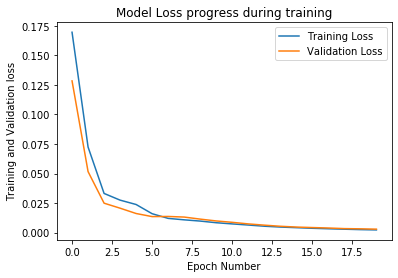

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss progress during training')
plt.ylabel('Training and Validation loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [23]:
x_test = np.array([[1,50,50000,10000,600000]])
ypred = model.predict(x_test)

In [24]:
print('Expected purchase amount', ypred)

Expected purchase amount [[52996.73]]


In [25]:
y_pred = model.predict(xtest)

In [26]:
from sklearn.metrics import r2_score
def performance_metric(y_test, y_pred):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_test, y_pred)
    
    # Return the score
    return score

performance_metric(ytest,y_pred)

0.8897418348629544